In [2]:
import boto3 
import json
import decimal
from boto3.dynamodb.conditions import Key, Attr

# 1.
## Create a table named “Recipes” in DynamoDB
### •Insert all the data in the file recipeitems.json into the database
### •Extract and use the "oid" as the partition key
### •Use the recipe "name" as the sort key
### •Store all other fields in an "Info" item/dictionary

In [3]:
dynamodb = boto3.resource('dynamodb', region_name='us-east-1') # find your region in your acct

table = dynamodb.create_table(
    TableName='Recipes',
    KeySchema=[
        {
            'AttributeName': 'oid',
            'KeyType': 'HASH'
        },
        {
            'AttributeName': 'name',
            'KeyType': 'RANGE'
        }
    ],
    AttributeDefinitions=[
        {
            'AttributeName': 'oid',
            'AttributeType': 'S'
        },
        {
            'AttributeName': 'name',
            'AttributeType': 'S'
        }
    ],
    ProvisionedThroughput={
        'ReadCapacityUnits': 10,
        'WriteCapacityUnits': 10
    }
)

print("Table status:", table.table_status)

Table status: CREATING


In [ ]:
dynamodb = boto3.resource('dynamodb', region_name='us-east-1')
table = dynamodb.Table('Recipes')

with open('recipeitems.json') as json_file:
    
    
    for line in json_file:
        recipe_obj = json.loads(line)

        print('Adding recipe:', recipe_obj['name'])
        
        table.put_item(
                       Item = {'oid' : (recipe_obj['_id']['$oid']),
                               'name' : recipe_obj['name'],
                               'info' : {'ingredients': recipe_obj.get('ingredients'),
                                        'url' : recipe_obj.get('url'),
                                        'image' : recipe_obj.get('image'),
                                        'ts' : recipe_obj.get('ts'),
                                        'cookTime' : recipe_obj.get('cookTime'),
                                        'source' : recipe_obj.get('source'),
                                        'recipeYield' : recipe_obj.get('recipeYield'),
                                        'datePublished' : recipe_obj.get('datePublished'),
                                        'prepTime' : recipe_obj.get('prepTime'),
                                        'description' : recipe_obj.get('description')
                                        }
                                }
                        )
        
                            

Adding recipe: Drop Biscuits and Sausage Gravy
Adding recipe: Hot Roast Beef Sandwiches
Adding recipe: Morrocan Carrot and Chickpea Salad
Adding recipe: Mixed Berry Shortcake
Adding recipe: Pomegranate Yogurt Bowl
Adding recipe: Krispy Easter Eggs
Adding recipe: Spinach and Kamut Salad with Chili-Orange Dressing
Adding recipe: Eggs in Hash Brown Nests
Adding recipe: Za'atar
Adding recipe: Pistachio Chocolate Chip Muffins
Adding recipe: Glazed Easter Ham
Adding recipe: Pretty, Yummy Fruit Salad
Adding recipe: No-Bake Chocolate Bottom Pumpkin Tart
Adding recipe: Seeded Popovers
Adding recipe: Spinach and Black Bean Quesadilla
Adding recipe: Easter Leftover Sandwich
Adding recipe: Kale Rice Bowl
Adding recipe: Chipotle Sweet Potato, Spinach, and Black Bean Tamales
Adding recipe: Quick Baked French Toast
Adding recipe: Pizza Potato Skins
Adding recipe: Alfajores with Dulce de Leche
Adding recipe: Marjoram Sauce with Capers &amp; Green Olives
Adding recipe: Sexy Cabbage (+ Cilantro-Lime Car

### Proof of data

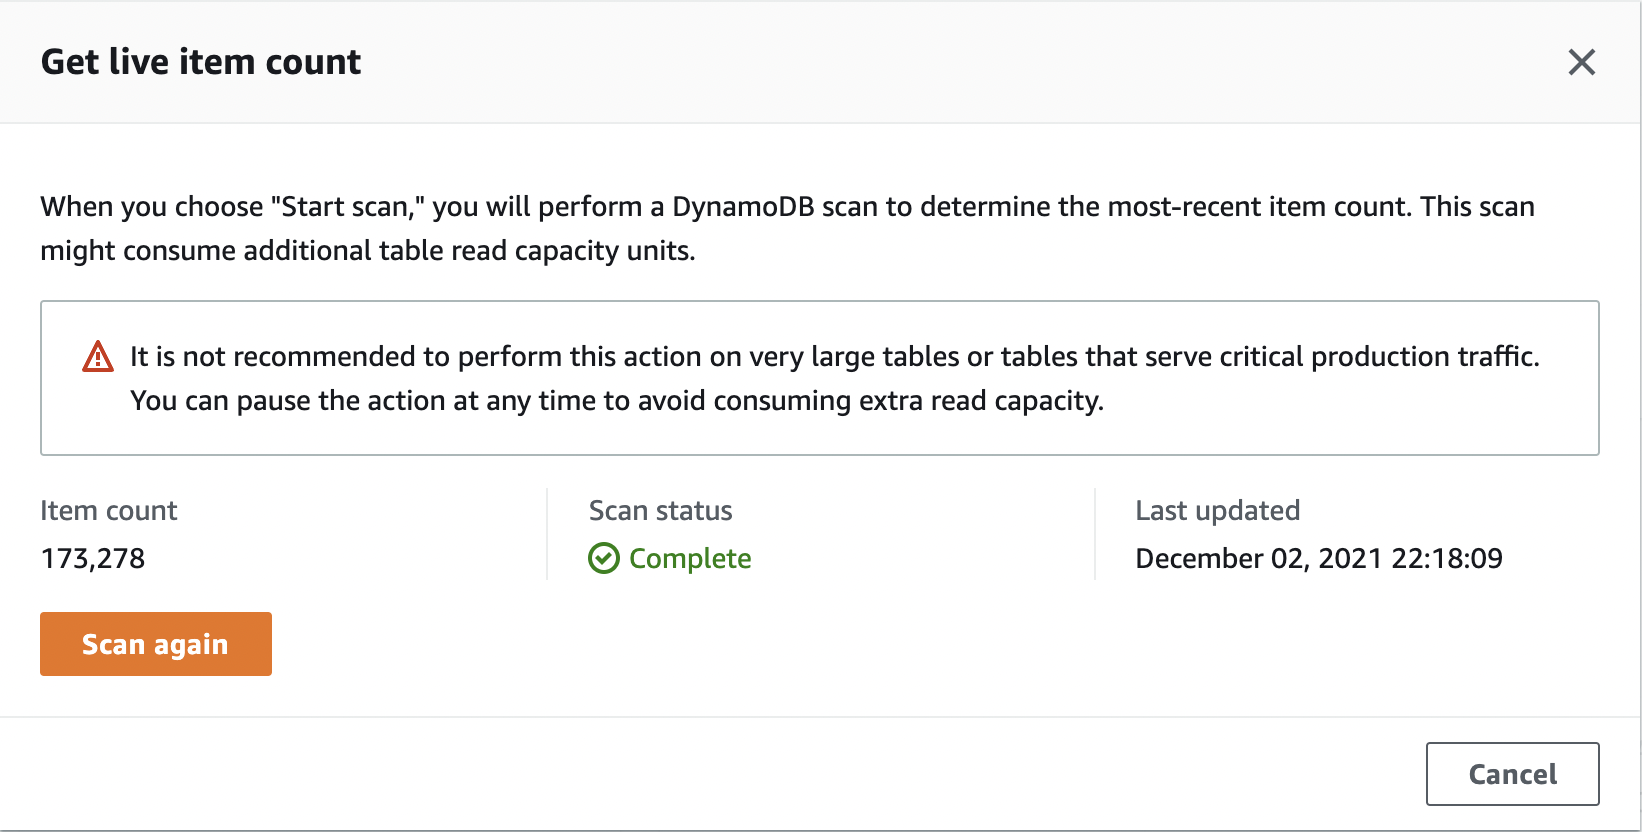

In [2]:
from IPython.display import Image
Image(filename='proof.png')

# 2.
## Query and Scan
### (a) Create a query or scan that finds recipes for breakfast foods (the description contains "breakfast" or "Breakfast"). How many are there? 

In [17]:
dynamodb = boto3.resource('dynamodb', region_name='us-east-1')
table = dynamodb.Table('Recipes')

#step 1
response = table.scan(
    FilterExpression=Attr('info.description').contains('breakfast') | Attr('info.description').contains('Breakfast')
)

totalbreakfast = response['Count']

#step 2 & step 3
while 'LastEvaluatedKey' in response:
    response = table.scan(
        FilterExpression = Attr('info.description').contains('breakfast') | Attr('info.description').contains('Breakfast'),
        ExclusiveStartKey = response['LastEvaluatedKey']
    )
    totalbreakfast += response['Count']
    

print("Total description contains \"breakfast\" or \"Breakfast\"):", totalbreakfast)


Total description contains "breakfast" or "Breakfast"): 3524


### (b) Issue a query or scan to find out how many of the recipes list "cinnamon/Cinnamon" as an ingredient.

In [19]:
dynamodb = boto3.resource('dynamodb', region_name='us-east-1')
table = dynamodb.Table('Recipes')

response = table.scan(
    FilterExpression = Attr('info.ingredients').contains('cinnamon') | Attr('info.ingredients').contains('Cinnamon')
)

totalcin = response['Count']

while 'LastEvaluatedKey' in response:
    response = table.scan(
        FilterExpression = Attr('info.ingredients').contains('cinnamon') | Attr('info.ingredients').contains('Cinnamon'),
        ExclusiveStartKey = response['LastEvaluatedKey']
    )
    totalcin += response['Count']

print("Total recipes list that contains \"cinnamon/Cinnamon\" as an ingredient:", totalcin)


Total recipes list that contains "cinnamon/Cinnamon" as an ingredient: 10526


### (c) Issue a query or scan to find out how many of the recipes list misspelled "cinamon" as an ingredient.

In [20]:
dynamodb = boto3.resource('dynamodb', region_name='us-east-1')
table = dynamodb.Table('Recipes')

response = table.scan(
    FilterExpression=Attr('info.ingredients').contains('cinamon')
)

totalmispelled = response['Count']

while 'LastEvaluatedKey' in response:
    response = table.scan(
        FilterExpression=Attr('info.ingredients').contains('cinamon'),
        ExclusiveStartKey = response['LastEvaluatedKey']
    )
    totalmispelled += response['Count']

print("Total recipes list that contains misspelled \"cinamon\" as aningredient:", totalmispelled)


Total recipes list that contains misspelled "cinamon" as aningredient: 9


### Extra
Wasn't sure to include mispelled "Cinamon" or not

In [22]:
dynamodb = boto3.resource('dynamodb', region_name='us-east-1')
table = dynamodb.Table('Recipes')

response = table.scan(
    FilterExpression=Attr('info.ingredients').contains('Cinamon')
)

totalmispelled = response['Count']

while 'LastEvaluatedKey' in response:
    response = table.scan(
        FilterExpression=Attr('info.ingredients').contains('Cinamon'),
        ExclusiveStartKey = response['LastEvaluatedKey']
    )
    totalmispelled += response['Count']

print("Total recipes list that contains misspelled \"Cinamon\" as aningredient:", totalmispelled)


Total recipes list that contains misspelled "Cinamon" as aningredient: 2
